<a href="https://colab.research.google.com/github/EasonChen78/machine_learning/blob/main/20230315_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
import pandas as pd
x = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = iris["target"]
total = x[:]
total["ans"] = y
total.to_csv("iris.csv", index=False, encoding="utf-8")

<ipython-input-37-cbd7c2bd58f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total["ans"] = y


In [38]:
from sklearn.model_selection import train_test_split
import numpy as np
x_np = np.array(x)
y_np = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(135, 4)
(15, 4)
(135,)
(15,)


In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [47, 45, 43]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 88\nvalue = [0, 45, 43]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.187\nsamples = 48\nvalue = [0, 5, 43]\nclass = virginica')]

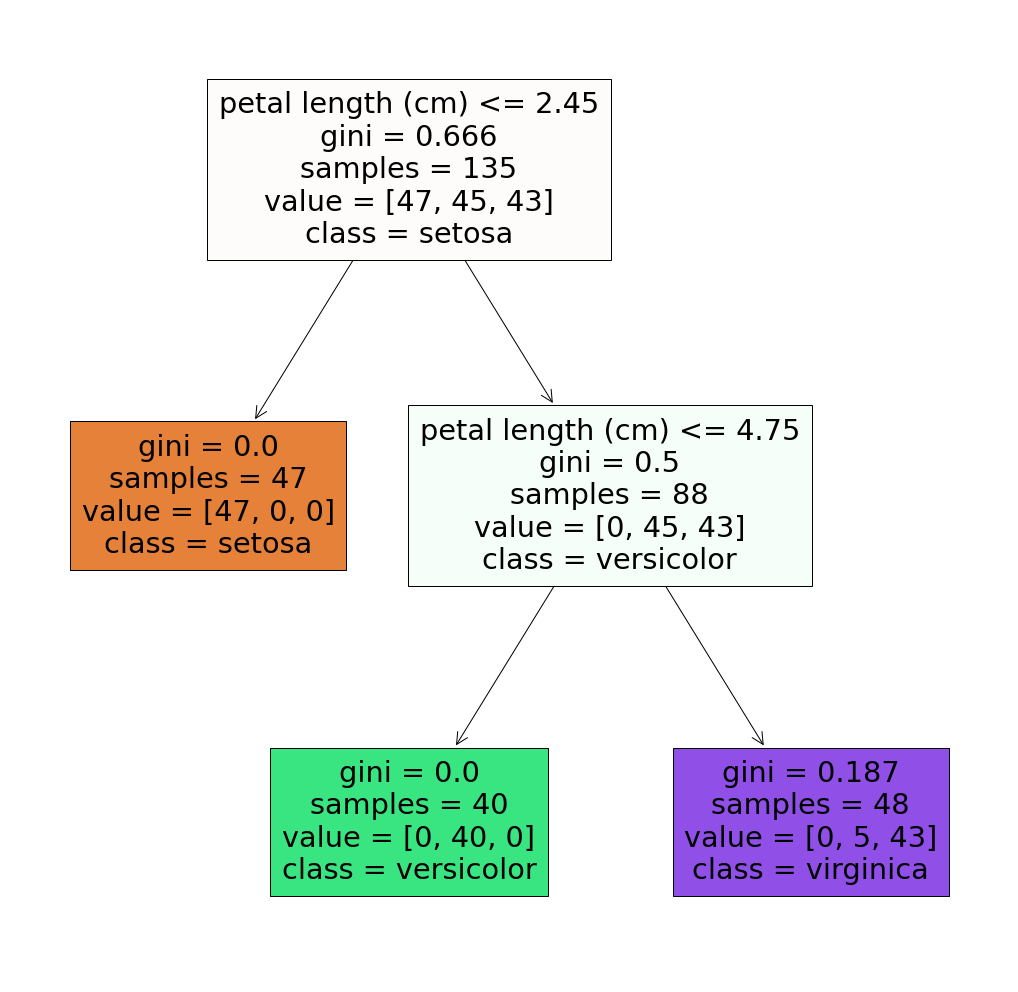

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 18))
plot_tree(clf,
     feature_names=x.columns, 
     class_names=iris["target_names"],
     filled=True
     ) 

In [41]:
x.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [42]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
print(accuracy_score(y_test, pre))

0.8666666666666667


In [43]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre), index=iris["target_names"], columns=iris["target_names"])

,setosa,versicolor,virginica
setosa,3,0,0
versicolor,0,4,1
virginica,0,1,6
